# DAMPED HARMONIC OSCILLATOR

$Solve\ \frac{d^2x}{dt^2}+\lambda \frac{dx}{dt} +kx = 0$

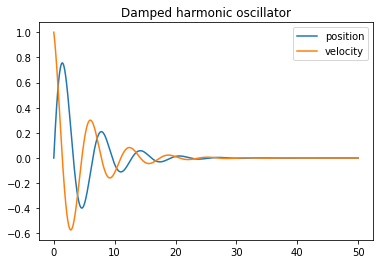

In [2]:
# IMPORTING NEEDED MODULES

import numpy as np
import matplotlib.pyplot as p
from scipy.integrate import odeint

def damp(u,t):                        # DEFYNING A FUNCTION TO DIVIDE THE 2nd ORDER EQUATION TO TWO FIRST ORDER EQUATIONS.
    x,y = u
    f = y
    g = (- lam*y - k*x)
    return [f,g]
k = 1
lam = 0.4                             # DEFYNING VALUE OF DAMPING FACTOR AND RESISTING FACTOR
u0 = [0,1]                            # INITIAL VALUES OF POSITION AND VELOCITY
t = np.linspace(0,50,1000)
k = odeint(damp , u0 , t)             # SOLVING TWO 1st ORDER EQUATION BY ODEINT MODULE
pos = k[:,0]
vel = k[:,1]

# PLOTTTING
import matplotlib.pyplot as p
p.plot(t,pos,label ='position')
p.plot(t,vel,label = 'velocity')
p.title('Damped harmonic oscillator')
p.legend()

# FORCED HARMONIC OSCILLATOR

$Solve\ \frac{d^2x}{dt^2}+\lambda \frac{dx}{dt}+kx = Fcos \omega t$ 

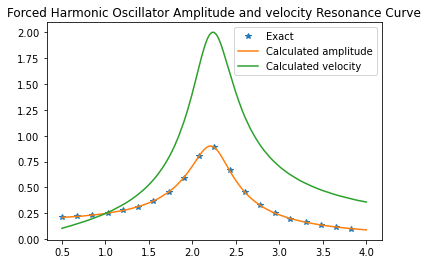

Now omega =  4.0


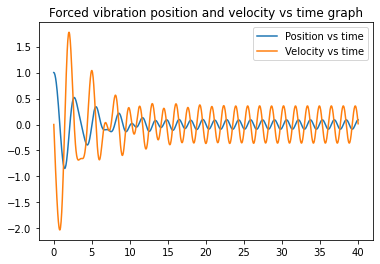

'\nWhen an oscillator is forced with a periodic driving force, the motion may seem chaotic. The motions of such oscillators are \nknown as transients. After the transients die out, the oscillator reaches a steady state, where the motion is periodic, and the\ndisplacement is determined.\n\n'

In [7]:
def forc(u,t):                             # DEFYNING A FUNCTION TO DIVIDE THE 2nd ORDER EQUATION TO TWO FIRST ORDER EQUATIONS.
    x,y = u
    f = y
    g = F*np.cos(w*t) - k*x - lam*y
    return [f,g]
lam = 0.5
k = 5
F = 1                                     # AMPLITUDE OF THE STUMULATING FORCE
frequency = np.linspace(0.5,4,1000)       # TAKING A RANGE OF FREQUENCY TO STUDY THE EFFECT OF RESONANCE
Amplitude = []
V = []
for i in range (0,len(frequency)):        # SOLVING THOSE 2 EQUATION FOR VARIOUS FREQUENCIES AND NOTING THE  STABILIZED AMPLITUDE AND VELOCITIES.
    w = frequency[i]
    u0 = [1,0]                     # INITIAL CONDITIONFOR POSITION AND VELOCITY
    t = np.linspace(0,40,1000)
    sol = odeint(forc,u0,t)        
    pos = sol[:,0]
    vel = sol[:,1]
    amplitude = np.max(pos[-300:])        # TO AVOID THE EFFECT OF TRANSIENT PHENOMENON AND TO GET STABIIZED DISPLACEMENT VALUES
    velocity = np.max(vel[-300:])         # AND VELOCITY VALUES ,TAKING FINAL LAST 100 VALUES OF THE OSCILLATION.
    Amplitude.append(amplitude)
    V.append(velocity)
# MADE AN ARRAY OF STABILIZED AMPLITUDE AND VELOCITY FOR DIFFERENT FREQUENCIES FOR STUDYING RESONANCE.   

# Exact 

A_exact = F/np.sqrt((k-(frequency**2))**2+((lam*frequency)**2))         # GIVEN EXACT SOLUTION

# PLOTTING
p.plot(frequency,A_exact,'*',markevery = 50,label = 'Exact')
p.plot(frequency,Amplitude,label = 'Calculated amplitude')
p.plot(frequency,V,label = 'Calculated velocity')
p.title('Forced Harmonic Oscillator Amplitude and velocity Resonance Curve')
p.legend()
p.show()

# TO PLOT POSITION AND VELOCITY PROFILE FORA CERTAIN FREQUENCY.
print('Now omega = ', w)
t = np.linspace(0,40,1000)
sol = odeint(forc,u0,t)
pos = sol[:,0]
vel = sol[:,1]
p.plot(t,pos,label = 'Position vs time')
p.plot(t,vel,label = 'Velocity vs time')
p.title('Forced vibration position and velocity vs time graph')
p.legend()
p.show()


'''
When an oscillator is forced with a periodic driving force, the motion may seem chaotic. The motions of such oscillators are 
known as transients. After the transients die out, the oscillator reaches a steady state, where the motion is periodic, and the
displacement is determined.

'''

